In [1]:
import numpy as np, csv, matplotlib.pyplot as plt, random
import matplotlib

%matplotlib inline

In [2]:
from Autoencoder_utils import Load_data, display_data

# ---------------Load & Visualize the training data------------------------
train_file_path = 'digitstrain.txt'
val_file_path = 'digitsvalid.txt'
test_file_path = 'digitstest.txt'
X_train, Y_train = Load_data(train_file_path)
X_val, Y_val = Load_data(val_file_path)
X_test, Y_test = Load_data(test_file_path)
print("Data Loaded...")
#display_data(X_train)

Data Loaded...


# Train Autoencoder


In [ ]:
from Autoencoder_utils import sigmoid, sigmoidGradient, Autoencoder_Initialize_Weights
from Autoencoder_utils import Autoencoder_cross_entropy_loss, Autoencoder_nnCostFunction, Autoencoder_forward_prop
from Autoencoder_utils import Autoencoder_backprop, Autoencoder_Train_network


In [4]:
#-------------------------------Network Architecture-----------------------
input_layer_size = 784
hidden_layer_size = 100                # List Sizes of the hidden layer
output_layer_size = input_layer_size
n_hidden = 1
layer_sizes=[input_layer_size, hidden_layer_size, output_layer_size]

# -------------------------Set Activation Function---------------------------
activ_func = sigmoid                   # can be sigmoid, ReLu, Tanh
activ_Grad_func = sigmoidGradient      # can be sigmoidGradient, ReLuGradient, TanhGradient

#----------------------------- Hyper Parameters -----------------------
epochmax = 80
LearningRate = 0.0001
reg_lambda = 0.2
momentum = 0.0
minibatchsize = 40 #Set =1 for regular stochastic gradient descent

#---------------Initialize Tied weights for all the layers:---------------
nn_weight_list = []
W = Autoencoder_Initialize_Weights((input_layer_size, hidden_layer_size)) #784 x 100
bias1 = np.zeros((hidden_layer_size,1))
bias2 = np.zeros((input_layer_size,1))
nn_weight_list = [W, bias1, bias2]

# ---------------Training Network------------------------
train_cost, val_cost, nn_weight_list =  Autoencoder_Train_network(epochmax, reg_lambda, LearningRate, minibatchsize, 
                                                                  nn_weight_list, layer_sizes, momentum,  activ_func, 
                                                                  activ_Grad_func, X_train, X_val)
print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
' Learning rate: {:1.4f}'.format(LearningRate), ' Layer Sizes',layer_sizes)


Training Neural net....
('epochmax: 80', ' L2 Regularization: 0.200', ' Learning rate: 0.00', 'Momentum : 0.000', ' Layer Sizes', [784, 100, 784])
Time 0
Cross Entropy 	 Training:  259.251287725 	 Validation:  260.131156268
Time 5
Cross Entropy 	 Training:  181.794694026 	 Validation:  182.792768214
Time 10
Cross Entropy 	 Training:  159.396750771 	 Validation:  160.542369461
Time 15
Cross Entropy 	 Training:  147.903628419 	 Validation:  149.177838841
Time 20
Cross Entropy 	 Training:  140.521494869 	 Validation:  141.927104681
Time 25
Cross Entropy 	 Training:  135.20690185 	 Validation:  136.72326288
Time 30
Cross Entropy 	 Training:  131.10253761 	 Validation:  132.722425544
Time 35
Cross Entropy 	 Training:  127.781070575 	 Validation:  129.489850978
Time 40
Cross Entropy 	 Training:  125.007551079 	 Validation:  126.798791774
Time 45
Cross Entropy 	 Training:  122.640453938 	 Validation:  124.51239227
Time 50
Cross Entropy 	 Training:  120.587418991 	 Validation:  122.532030879
T

('epochmax: 80', ' L2 Regularization: 0.200', ' Learning rate: 0.00', ' Layer Sizes', [784, 100, 784])
Train 112.444784373
Val 114.745278183
Test 112.235803251


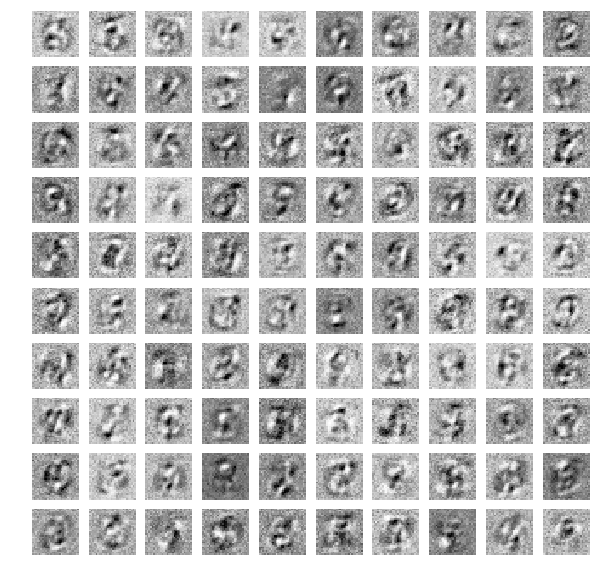

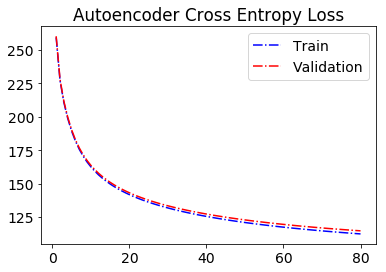

In [5]:
print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
  ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

# ---------------Printing Results------------------------
J_train, activations =  Autoencoder_nnCostFunction(nn_weight_list, layer_sizes, X_train, reg_lambda)
print 'Train', J_train

J_val, _ =  Autoencoder_nnCostFunction(nn_weight_list, layer_sizes, X_val, reg_lambda)
print 'Val',J_val

J_test, activations  =  Autoencoder_nnCostFunction(nn_weight_list, layer_sizes, X_test, reg_lambda)
print 'Test',J_test

# ---------------Plotting Results------------------------
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0].reshape((28,28,100))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[:,:,i-1], cmap=plt.cm.Greys)
    ax.axis('off')
#plt.savefig('Autoencoder_features.png',dpi = 200)
plt.show()

plt.figure()
time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('Autoencoder Cross Entropy Loss')
#plt.savefig('Autoencoder_loss.png',dpi = 200)


In [6]:
Autoencoder_trained_weights = nn_weight_list

In [9]:
import pickle
pickle.dump( Autoencoder_trained_weights, open( "Autoencoder_trained_weights.p", "wb" ) )

# Using Neural network with pretrained weights from Autoencoder

In [5]:
from utils import randInitializeWeights, Unroll_weights, forward_prop, cross_entropy_loss, Roll_weights, backprop
from utils import Tanh, TanhGradient, ReLu, ReLuGradient, Mean_classification_error, Train_network, sigmoid, sigmoidGradient

import pickle
Autoencoder_trained_weights = pickle.load( open( "Autoencoder_trained_weights.p", "rb" ) )

Training Neural net....
('epochmax: 50', ' L2 Regularization: 0.000', ' Learning rate: 0.05', 'Momentum : 0.900', ' Layer Sizes', [784, 100, 10])
Time 0
Cross Entropy 	 Training:  0.541641378394 	 Validation:  0.710905582293
Mean  Error : 	 Training:  0.096 	 Validation: 0.128
Time 10
Cross Entropy 	 Training:  0.0258726360559 	 Validation:  0.463017141867
Mean  Error : 	 Training:  0.001 	 Validation: 0.062
Time 20
Cross Entropy 	 Training:  0.0252645786903 	 Validation:  0.463202660554
Mean  Error : 	 Training:  0.001 	 Validation: 0.062
Time 30
Cross Entropy 	 Training:  0.025264014684 	 Validation:  0.463202499109
Mean  Error : 	 Training:  0.001 	 Validation: 0.062
Time 40
Cross Entropy 	 Training:  0.0252640141358 	 Validation:  0.463202499039
Mean  Error : 	 Training:  0.001 	 Validation: 0.062
('epochmax: 50', ' L2 Regularization: 0.000', ' Learning rate: 0.05', ' Layer Sizes', [784, 100, 10])
Train 0.0252640141353 0.001
Val 0.463202499038 0.062
Test 0.525291655849 0.0846666666

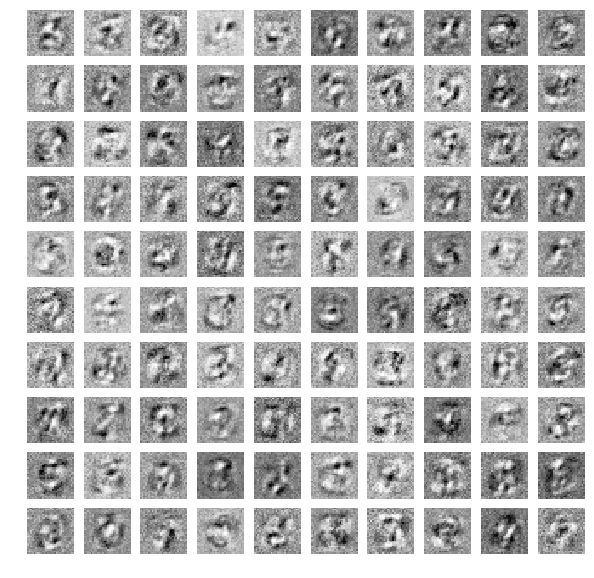

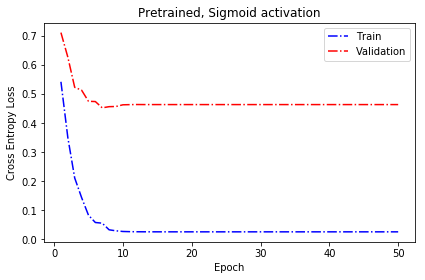

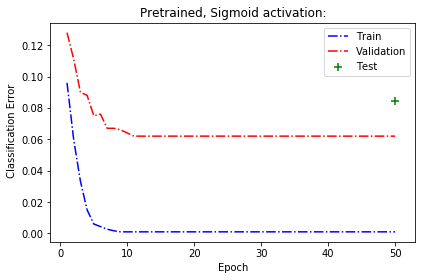

In [6]:
#-------------------------------Network Architecture-----------------------
n_hidden=1
input_layer_size=784
hidden_layer_size=[100]
num_labels = 10
layer_sizes=[input_layer_size]
layer_sizes.extend([hidden_layer_size[j] for j in range(len(hidden_layer_size))])
layer_sizes.append(num_labels)

# ----------------------------- Initializing Params------------------------
nn_weight_list = []
for i in range(len(layer_sizes)-1):
    L_in = layer_sizes[i]
    L_out = layer_sizes[i+1]
    np.random.seed(0)
    if i==0:
        W = np.vstack((Autoencoder_trained_weights[0],Autoencoder_trained_weights[1].T)).T
    else:
        W = randInitializeWeights(L_in, L_out) #(100, 785)
    nn_weight_list.append(W)

nnparams = Unroll_weights(nn_weight_list, layer_sizes)

#------------------------------ Hyper Parameters ----------------------------
epochmax = 50
LearningRate = 0.05
reg_lambda = 0.0001
minibatchsize = 32          #Set =1 for regular stochastic gradient descent
momentum = 0.9
# -------------------------Set Activation Function----------------------------
activ_func = sigmoid#Tanh
activ_Grad_func = sigmoidGradient#TanhGradient

# ----------------------------Training Network--------------------------------
train_cost, val_cost, err_tr, err_val, nn_weight_list = Train_network(epochmax, reg_lambda, LearningRate, nnparams, layer_sizes, minibatchsize, momentum,  activ_func, activ_Grad_func, X_train, Y_train, X_val, Y_val)

print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
  ' Learning rate: {:1.2f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

# ---------------Printing Results------------------------
activations = forward_prop(layer_sizes, nn_weight_list, X_train, Y_train, activ_func)
output_p = activations[-1]
J_train= cross_entropy_loss(num_labels, output_p, Y_train, reg_lambda, nn_weight_list)
mean_err = Mean_classification_error(Y_train,output_p)
print 'Train', J_train, mean_err

activation_val = forward_prop(layer_sizes, nn_weight_list, X_val, Y_val, activ_func)
output_p = activation_val[-1]
J_val =  cross_entropy_loss(num_labels, output_p, Y_val, reg_lambda, nn_weight_list)
mean_err2 = Mean_classification_error(Y_val,output_p)
print 'Val',J_val, mean_err2

activation_test = forward_prop(layer_sizes, nn_weight_list, X_test, Y_test, activ_func)
output_p = activation_test[-1]
mean_err = Mean_classification_error(Y_test,output_p)
J_test =  cross_entropy_loss(num_labels, output_p, Y_test, reg_lambda, nn_weight_list)
print 'Test',J_test, mean_err

# ---------------Plotting Results------------------------
print "Test Performance is", 100.0*(1-mean_err),'%'


time = np.arange(epochmax/len(train_cost),epochmax+1,epochmax/len(train_cost))
fig = plt.figure(figsize=(10,10))
W = nn_weight_list[0][:,0:-1].reshape((100,28,28))
for i in range(1,101):
    ax = plt.subplot(10,10,i)
    plt.imshow(W[i-1], cmap=plt.cm.Greys)
    ax.axis('off')
#plt.savefig('NN_AE_pretrained_weights.png',dpi = 200)
plt.show()

plt.figure()
plt.plot(time,train_cost,'b-.')
plt.plot(time,val_cost,'r-.')
plt.legend(['Train','Validation'])
plt.title('Pretrained, Sigmoid activation')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.tight_layout()
#plt.savefig('NN_AE_pretrained_loss.png',dpi = 200)

plt.figure()
plt.plot(time,err_tr,'b-.')
plt.plot(time,err_val,'r-.')
plt.scatter(epochmax,mean_err,c='green',marker = '+',s = 80)
plt.legend(['Train','Validation','Test'])
plt.title('Pretrained, Sigmoid activation:')
plt.xlabel('Epoch')
plt.ylabel(' Classification Error')
plt.tight_layout()
#plt.savefig('NN_AE_pretrained_error.png',dpi = 200)


# Vary Hidden Units

In [11]:
activ_func = sigmoid                   # can be sigmoid, ReLu, Tanh
activ_Grad_func = sigmoidGradient      # can be sigmoidGradient, ReLuGradient, TanhGradient

def Autoencoder_hid_units(hid = 100, LearningRate = 0.005):
    #-------------------------------Network Architecture-----------------------
    input_layer_size = 784
    hidden_layer_size = hid                # List Sizes of the hidden layer
    output_layer_size = input_layer_size
    n_hidden = 1
    layer_sizes=[input_layer_size, hidden_layer_size, output_layer_size]

    # -------------------------Set Activation Function---------------------------
    activ_func = sigmoid                   # can be sigmoid, ReLu, Tanh
    activ_Grad_func = sigmoidGradient      # can be sigmoidGradient, ReLuGradient, TanhGradient

    #----------------------------- Hyper Parameters -----------------------
    epochmax = 50
    LearningRate = 0.005
    reg_lambda = 0.2
    momentum = 0.7
    minibatchsize = 32 #Set =1 for regular stochastic gradient descent

    #---------------Initialize Tied weights for all the layers:---------------
    nn_weight_list = []
    W = Autoencoder_Initialize_Weights((input_layer_size, hidden_layer_size)) #784 x 100
    bias1 = np.zeros((hidden_layer_size,1))
    bias2 = np.zeros((input_layer_size,1))
    nn_weight_list = [W, bias1, bias2]

    # ---------------Training Network------------------------
    train_cost, val_cost, nn_weight_list = Autoencoder_Train_network(epochmax, reg_lambda, LearningRate, minibatchsize, nn_weight_list, layer_sizes, momentum,  activ_func, activ_Grad_func, X_train, X_val)
    print('epochmax:{:3.0f}'.format(epochmax),' L2 Regularization: {:1.3f}'.format(reg_lambda),
    ' Learning rate: {:1.4f}'.format(LearningRate), ' Layer Sizes',layer_sizes)

    return(train_cost, val_cost)

In [12]:
(J_train_h50, J_val_h50) = Autoencoder_hid_units(hid = 50)

Training Neural net....
('epochmax: 50', ' L2 Regularization: 0.200', ' Learning rate: 0.01', 'Momentum : 0.700', ' Layer Sizes', [784, 50, 784])
Time 0
Cross Entropy 	 Training:  135.639452191 	 Validation:  137.333720717
Time 5
Cross Entropy 	 Training:  115.400900778 	 Validation:  118.405154455
Time 10
Cross Entropy 	 Training:  112.310942586 	 Validation:  115.525601284
Time 15
Cross Entropy 	 Training:  110.199332719 	 Validation:  113.46893038
Time 20
Cross Entropy 	 Training:  108.476762211 	 Validation:  112.080011311
Time 25
Cross Entropy 	 Training:  106.75962779 	 Validation:  110.338937447
Time 30
Cross Entropy 	 Training:  106.649069043 	 Validation:  110.228911854
Time 35
Cross Entropy 	 Training:  106.64722543 	 Validation:  110.227201129
Time 40
Cross Entropy 	 Training:  106.647171611 	 Validation:  110.227153295
Time 45
Cross Entropy 	 Training:  106.647169932 	 Validation:  110.227151882
('epochmax: 50', ' L2 Regularization: 0.200', ' Learning rate: 0.0050', ' Layer

In [13]:
(J_train_h100, J_val_h100) = Autoencoder_hid_units(hid = 100)

Training Neural net....
('epochmax: 50', ' L2 Regularization: 0.200', ' Learning rate: 0.01', 'Momentum : 0.700', ' Layer Sizes', [784, 100, 784])
Time 0
Cross Entropy 	 Training:  118.033822481 	 Validation:  120.32342957
Time 5
Cross Entropy 	 Training:  96.124599708 	 Validation:  99.7612387096
Time 10
Cross Entropy 	 Training:  91.4423824436 	 Validation:  95.3889618804
Time 15
Cross Entropy 	 Training:  89.3701758768 	 Validation:  93.5476936466
Time 20
Cross Entropy 	 Training:  87.8097753779 	 Validation:  92.0753114832
Time 25
Cross Entropy 	 Training:  87.0230366806 	 Validation:  91.2560011772
Time 30
Cross Entropy 	 Training:  86.9890558407 	 Validation:  91.226796887
Time 35
Cross Entropy 	 Training:  86.9888431039 	 Validation:  91.2265840889
Time 40
Cross Entropy 	 Training:  86.9888361551 	 Validation:  91.2265774613
Time 45
Cross Entropy 	 Training:  86.9888359408 	 Validation:  91.2265773895
('epochmax: 50', ' L2 Regularization: 0.200', ' Learning rate: 0.0050', ' Laye

In [14]:
(J_train_h200, J_val_h200) = Autoencoder_hid_units(hid = 200)

Training Neural net....
('epochmax: 50', ' L2 Regularization: 0.200', ' Learning rate: 0.01', 'Momentum : 0.700', ' Layer Sizes', [784, 200, 784])
Time 0
Cross Entropy 	 Training:  106.806533075 	 Validation:  109.153725765
Time 5
Cross Entropy 	 Training:  81.9917602975 	 Validation:  85.7415058398
Time 10
Cross Entropy 	 Training:  78.3295492083 	 Validation:  82.6008935163
Time 15
Cross Entropy 	 Training:  74.9327159822 	 Validation:  79.0185140197
Time 20
Cross Entropy 	 Training:  74.7723587451 	 Validation:  78.8805393924
Time 25
Cross Entropy 	 Training:  74.7664986969 	 Validation:  78.8741980051
Time 30
Cross Entropy 	 Training:  74.7663901691 	 Validation:  78.8741267548
Time 35
Cross Entropy 	 Training:  74.766386796 	 Validation:  78.8741255816
Time 40
Cross Entropy 	 Training:  74.7663866919 	 Validation:  78.8741255333
Time 45
Cross Entropy 	 Training:  74.7663866888 	 Validation:  78.8741255316
('epochmax: 50', ' L2 Regularization: 0.200', ' Learning rate: 0.0050', ' La

In [15]:
(J_train_h500, J_val_h500) = Autoencoder_hid_units(hid = 500, LearningRate = 0.001)

Training Neural net....
('epochmax: 50', ' L2 Regularization: 0.200', ' Learning rate: 0.01', 'Momentum : 0.700', ' Layer Sizes', [784, 500, 784])
Time 0
Cross Entropy 	 Training:  99.3851409719 	 Validation:  101.885903085
Time 5
Cross Entropy 	 Training:  70.779018895 	 Validation:  74.0024988726
Time 10
Cross Entropy 	 Training:  68.3970667416 	 Validation:  71.7943104446
Time 15
Cross Entropy 	 Training:  66.9557465908 	 Validation:  70.4490019445
Time 20
Cross Entropy 	 Training:  65.9957156933 	 Validation:  69.5660538553
Time 25
Cross Entropy 	 Training:  65.1493350199 	 Validation:  68.7087429456
Time 30
Cross Entropy 	 Training:  64.956220519 	 Validation:  68.5082927483
Time 35
Cross Entropy 	 Training:  64.9537975536 	 Validation:  68.5067846525
Time 40
Cross Entropy 	 Training:  64.953782459 	 Validation:  68.5067708931
Time 45
Cross Entropy 	 Training:  64.9537820391 	 Validation:  68.506770895
('epochmax: 50', ' L2 Regularization: 0.200', ' Learning rate: 0.0050', ' Layer

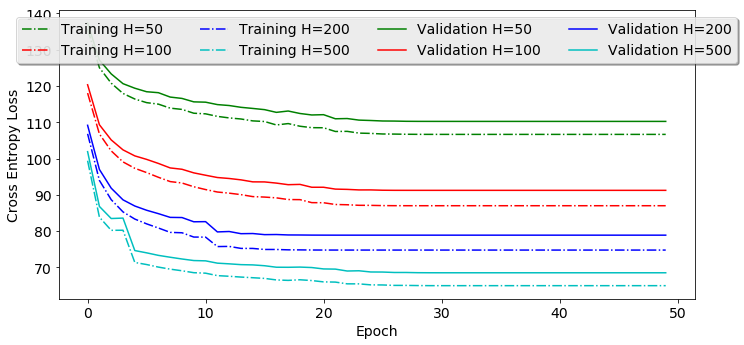

In [16]:
# Plotting convergence for k= 5,10,20
plt.figure(figsize=(10,5))

plt.plot(range(len(J_train_h50)), J_train_h50, '-.g')
plt.plot(range(len(J_train_h100)), J_train_h100, '-.r')
plt.plot(range(len(J_train_h200)), J_train_h200, '-.b')
plt.plot(range(len(J_train_h500)), J_train_h500, '-.c')

plt.plot(range(len(J_val_h50)), J_val_h50, 'g')
plt.plot(range(len(J_val_h100)), J_val_h100, 'r')
plt.plot(range(len(J_val_h200)), J_val_h200, 'b')
plt.plot(range(len(J_val_h500)), J_val_h500, 'c')

plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend(['Training H=50','Training H=100','Training H=200','Training H=500', 
            'Validation H=50','Validation H=100','Validation H=200', 'Validation H=500'],loc='upper center', 
           bbox_to_anchor=(0.5, 1.0),
          ncol=4, fancybox=True, shadow=True)
#plt.title('Validation Cross entropy')
plt.tight_layout()
#plt.savefig("Prob5e_Autoencoder.png",dpi=200)